# **Cost of Treatment of Patient Prediction**

# **1. Importing Necessary Libraries**




In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# **2. Load the dataset**


In [2]:
df= pd.read_csv('./dataset/insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (1338, 7)


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **3.Explore the Data**




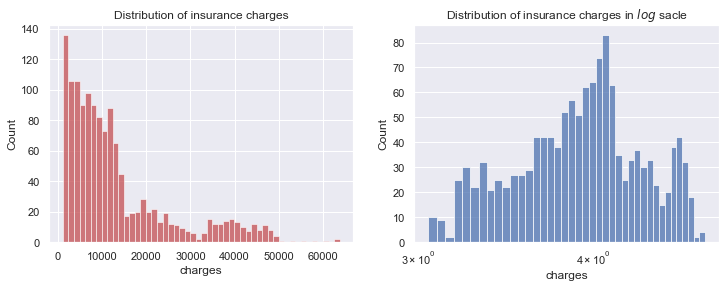

In [8]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()


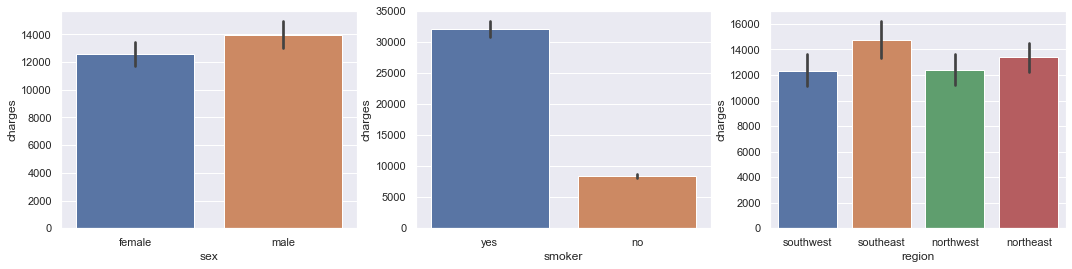

In [9]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

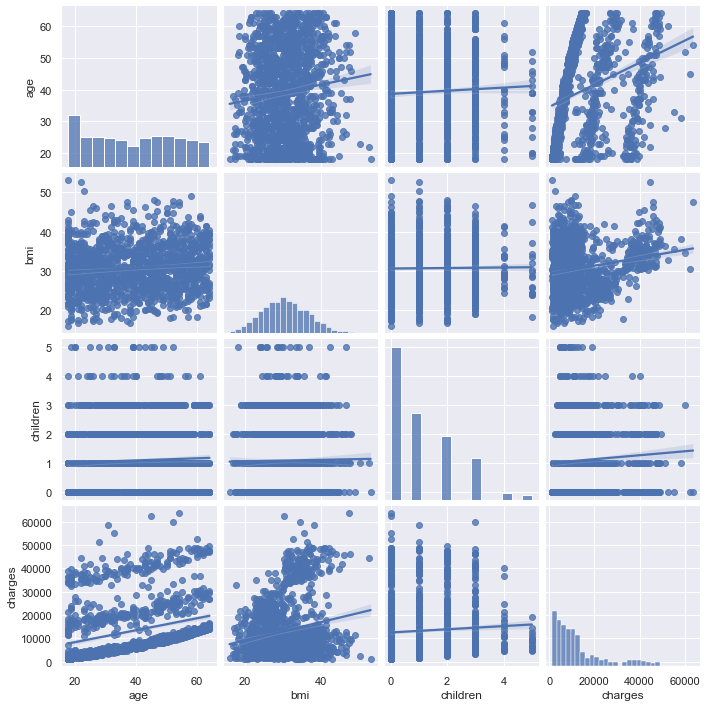

In [10]:
sns.pairplot(df,kind="reg")

<AxesSubplot:>

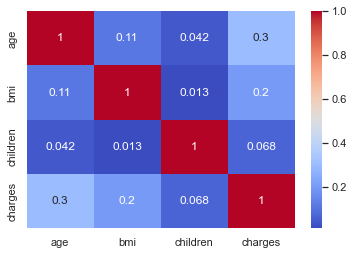

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

# **4.Preprocessing**



In [12]:
df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [13]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# **5.Train Test split**

In [16]:
from sklearn.model_selection import train_test_split


X = df.drop('charges',axis=1) 
y = df['charges'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **6.Model**
 
## Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7672642952734358


## Polynomial Features

In [19]:
X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1)
Y = df.charges


quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.884919734414723


## Random Forest Regressor

In [20]:
forest = RandomForestRegressor(n_estimators = 1000,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print(forest.score(X_test,Y_test))

MSE train data: 23934128.101, MSE test data: 160834356.857
-0.04382625390224271


## KNN Regressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor
kmeans = KNeighborsRegressor(n_neighbors=10)
kmeans.fit(X_train, y_train)

kmeans_train_pred = kmeans.predict(X_train)
kmeans_test_pred = kmeans.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,kmeans_train_pred),
mean_squared_error(y_test,kmeans_test_pred)))
print(kmeans.score(X_test,Y_test))

MSE train data: 131160006.160, MSE test data: 160284991.508
-0.21272649537219723
